In [1]:
import pandas as pd
import sklearn
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
pos_df =  pd.read_csv("C:/Users/jO/Desktop/DH_MA_Arbeit/coding/golden sample tagging/vwdazb_lg.csv", sep=";")

In [4]:
pos_df.head()

,text,POS,POS_na
0,der,DET,DET
1,Körper,NOUN,NOUN
2,will,AUX,AUX
3,sich,PRON,PRON
4,ja,ADV,PART


In [5]:
actual = pos_df["POS_na"].astype(str)
predicted = pos_df["POS"].astype(str)

In [6]:
actual_labels = actual.unique()
predicted_labels = predicted.unique()
all_labels = sorted(list(set(actual_labels) | set(predicted_labels)))

In [7]:
cm = metrics.confusion_matrix(actual, predicted, labels=all_labels)

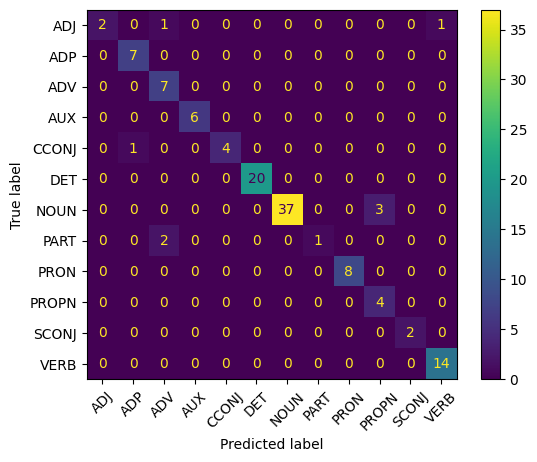

In [8]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=all_labels)
cm_display.plot(xticks_rotation=45)
plt.show() 

In [9]:
folderpath = "C:/Users/jO/Desktop/DH_MA_Arbeit/coding/golden sample tagging/"

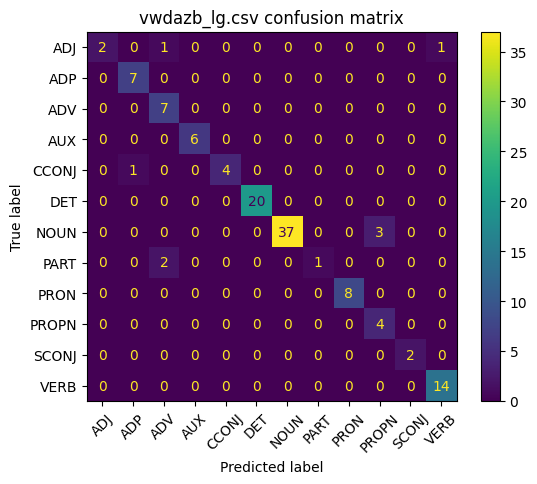

accuracy: 0.9333333333333333, 
 overall precision: 0.9333333333333333, 
 overall recall: 0.9333333333333333, 
 overall f1-score: 0.9333333333333333


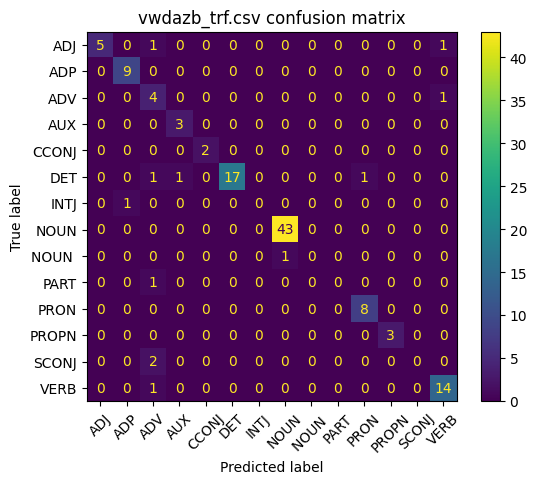

accuracy: 0.9, 
 overall precision: 0.9, 
 overall recall: 0.9, 
 overall f1-score: 0.9


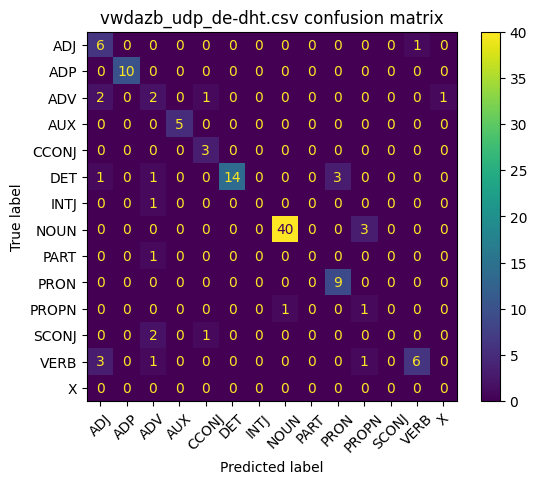

accuracy: 0.8, 
 overall precision: 0.8, 
 overall recall: 0.8, 
 overall f1-score: 0.8


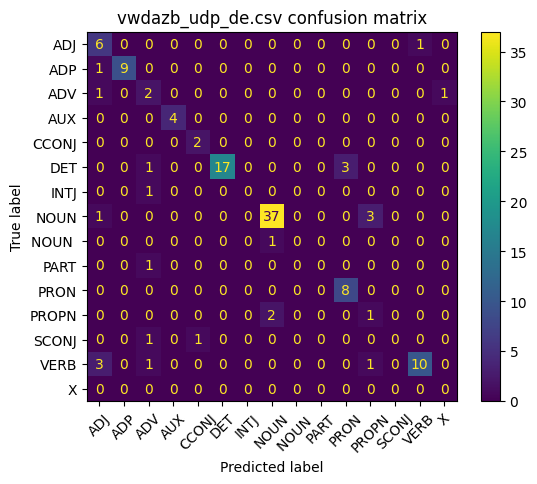

accuracy: 0.8, 
 overall precision: 0.8, 
 overall recall: 0.8, 
 overall f1-score: 0.8


In [10]:
for filename in os.listdir(folderpath):

    if filename.endswith('.csv'):
        file_path = os.path.join(folderpath, filename)
        csvdf = f"{filename}_df"
        csvdf = pd.read_csv(file_path, sep=";")
        
        actual = csvdf["POS_na"].astype(str)
        predicted = csvdf["POS"].astype(str)

        actual_labels = actual.unique()
        predicted_labels = predicted.unique()
        all_labels = sorted(list(set(actual_labels) | set(predicted_labels)))

        cmname = f"{filename}_cm"
        
        cmname = metrics.confusion_matrix(actual, predicted, labels=all_labels)

        accuracy = metrics.accuracy_score(actual, predicted)
        overall_precision = metrics.precision_score(actual, predicted, average='micro')
        overall_recall = metrics.recall_score(actual, predicted, average='micro')
        overall_f1_score = metrics.f1_score(actual, predicted, average='micro')

        
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmname, display_labels=all_labels)
        cm_display.plot(xticks_rotation=45)
        plt.title(f'{filename} confusion matrix')
        plt.show()
        print(f"accuracy: {accuracy}, \n overall precision: {overall_precision}, \n overall recall: {overall_recall}, \n overall f1-score: {overall_f1_score}")
    

Es zeigt sich, dass die Modelle von SpaCy besser laufen als jene von UDPipe. Zudem läuft das lg-Modell von SpaCy um ein paar Prozent besser, als das trf-Modell.